In [3]:
from google.colab import drive
drive.mount('/content/drive')  # Смонтировать Диск

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/IS_LR3')  # Правильный путь

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 123)


# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [8]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [9]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()
# компилируем и обучаем модель
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 47s 427ms/step - accuracy: 0.1470 - loss: 2.2933 - val_accuracy: 0.6295 - val_loss: 2.0603
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 418ms/step - accuracy: 0.6329 - loss: 1.6934 - val_accuracy: 0.7963 - val_loss: 0.7763
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 409ms/step - accuracy: 0.7699 - loss: 0.7786 - val_accuracy: 0.8455 - val_loss: 0.5514
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 43s 411ms/step - accuracy: 0.8124 - loss: 0.6159 - val_accuracy: 0.8683 - val_loss: 0.4603
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 409ms/step - accuracy: 0.8372 - loss: 0.5313 - val_accuracy: 0.8857 - val_loss: 0.4070
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 45s 420ms/step - accuracy: 0.8568 - loss: 0.4730 - val_accuracy: 0.8968 - val_loss: 0.3593
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 413ms/step - accuracy: 0.8738 - loss: 0.4254 - val_accuracy: 0.9078 - val_loss: 0.3253
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 417ms/step - accuracy: 0.8831 - loss: 0

In [10]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9470 - loss: 0.1815
Loss on test data: 0.17656435072422028
Accuracy on test data: 0.9498999714851379


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
NN output: [[3.0897139e-05 9.9081528e-01 4.4518107e-04 1.4293649e-03 9.3897019e-04
  1.5827973e-04 2.9317071e-04 2.5718326e-03 8.2969037e-04 2.4873116e-03]]
Real mark:  1
NN answer:  1


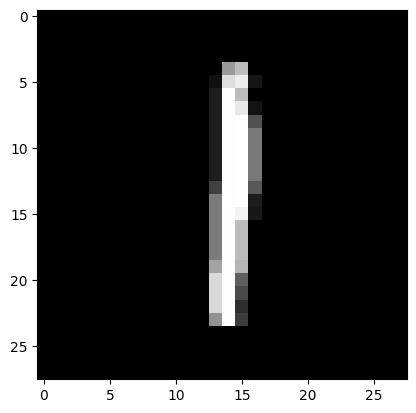

In [11]:
# вывод тестового изображения и результата распознавания
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.show()
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
print('Real mark: ', np.argmax(y_test[n]))
print('NN answer: ', np.argmax(result))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       984
           1       0.97      0.98      0.98      1186
           2       0.94      0.94      0.94       963
           3       0.95      0.93      0.94      1004
           4       0.96      0.96      0.96       978
           5       0.94      0.96      0.95       931
           6       0.97      0.98      0.97       938
           7       0.94      0.94      0.94      1019
           8       0.95      0.90      0.92      1013
           9       0.91      0.93      0.92       984

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



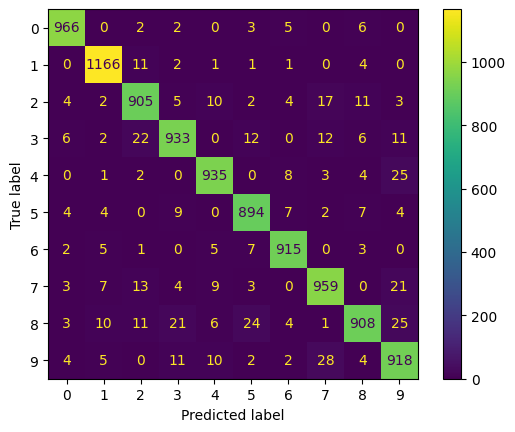

In [12]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

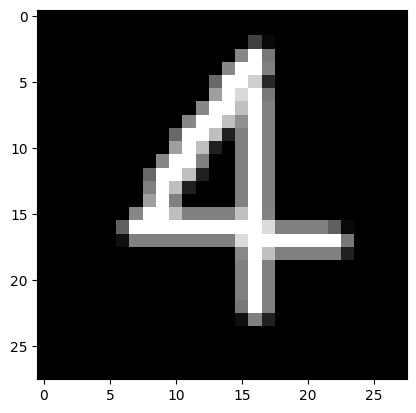

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
I think it's  4


In [17]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()

# предобработка
test_img = test_img / 255
test_img = np.reshape(test_img, (1,28,28,1))

# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))